# COMP 590 - Module 2 Assignment
## Examining Drug Overdose Death Rates in the United States
### Bridget Lin

_**Target Question:** What is the burden of drug overdose deaths in the United States (U.S.) and how does it differ over time and within population subgroups?_


Drug overdose deaths have been neither stagnant across time nor consistent across population subgroups in the U.S. In order to investigate this further, we can look at mortality rates throughout the years, as well as comparisons across demographic charactersitics like sex, age, race, and geogrpahic location. This project seeks to examine these aspects through three visualizations (1. Trends over time, 2. Drug overdose death rates by gender, and 3. Drug overdose death rates by age group). 

Data for this project come from CDC data from 1999-2018, which can be retrieved from this link: https://catalog.data.gov/dataset/drug-overdose-death-rates-by-drug-type-sex-age-race-and-hispanic-origin-united-states-3f72f/resource/48eb6490-5709-43f3-ae4a-3c7d3a4b0c2c?inner_span=True

In [38]:
# Import pandas and the drug overdose dataset
import pandas as pd

data = pd.read_csv("Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv")

Below is a plot showing the age-adjusted mortality rates (per 100,000 U.S. resident population) over time (1999-2018) based on the type of overdose. These data represent the total rates, irrespective of gender, race, and age. 

The overall drug overdose death rates have steadily increased over time, starting at 6.0 per 100,000 in 1999 and inflating to 20.7 per 100,000 in 2018. There are slight declines from 2011 to 2012 and 2017 to 2018 (~4.6% lower in 2018), which can be attributed to a multitude of factors, including the implementation of effective policy changes, public health interventions, and changes in drug availability. It is interesting to note, there is an increase in the death rate for synthetic opioids other than methadone (e.g. tramadol, fentanyl) from 2017 (9.0) to 2018 (9.9), despite declines in the rates of all other types of drug overdose deaths.

In [39]:
#Altair Visualization
import altair as alt

filtered_data = data[(data['AGE'] == 'All ages') & (data['STUB_LABEL'] == 'All persons') & (data['STUB_NAME'] == 'Total') & (data['UNIT'] == 'Deaths per 100,000 resident population, age-adjusted')]

# Mapping for PANEL variable
panel_mapping = {'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids other than methadone', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural and semisynthetic opioids'}

# Aggregate the data (group by year and panel and calculate the mean for the estimate)
agg_data = filtered_data.groupby(['YEAR', 'PANEL']).agg({'ESTIMATE': 'mean'}).reset_index()

#apply panel mapping created above
agg_data['PANEL'] = agg_data['PANEL'].replace(panel_mapping)

# Create a line chart to visualize change over time
line_chart = alt.Chart(agg_data).mark_line().encode(
    x=alt.X('YEAR:O', axis=alt.Axis(title='Year')),
    y=alt.Y('ESTIMATE:Q', axis=alt.Axis(title='Deaths per 100,000')),
        color=alt.Color('PANEL:N', legend=alt.Legend(title='Type of Overdose', titleLimit=600, orient='right', columns=1, labelLimit=0))
).properties(
    title='Drug Overdose Death Rates by Year (1999-2018) Based on Type of Overdose',
    width=800, 
    height = 600
)

line_chart

alt.Chart(...)

Next, we can examine the differences in the drug overdose death rates between sexes, as depicted in the side-by-side bar below. For the purposes of illustration, the year 2018 was selected, but similar trends exist across time. 

For all types of drugs, the overdose death rates are higher for males than females by a substantial amount. 

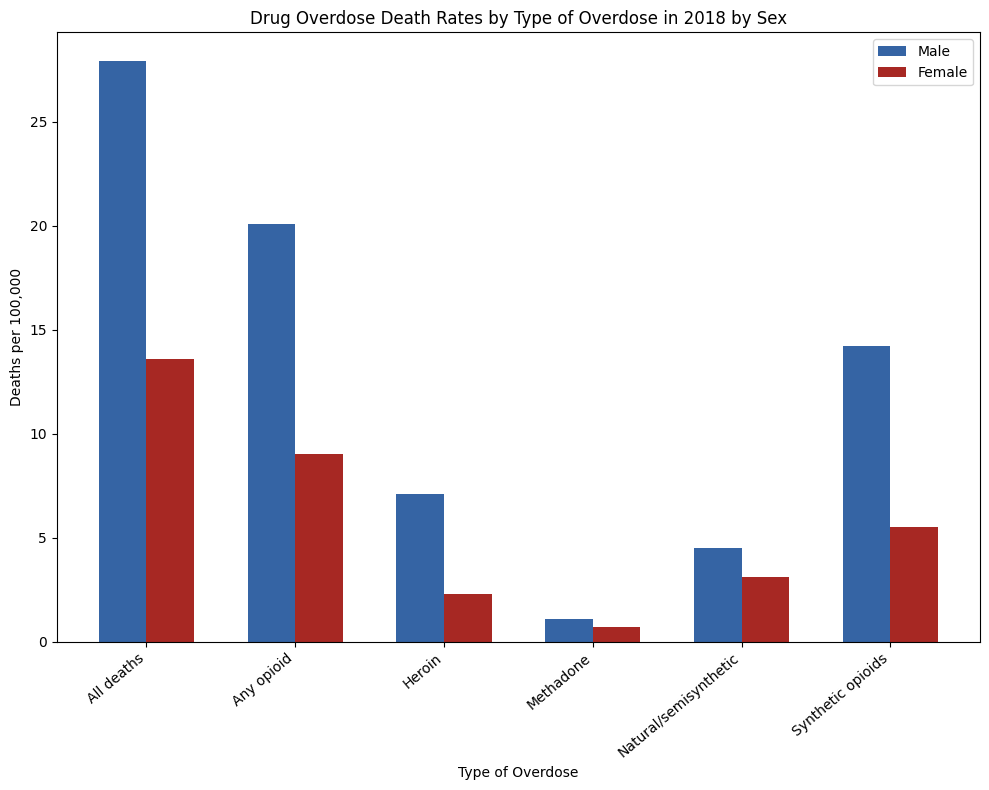

In [43]:
#Matplotlib Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data filtering and re-labeling
filtered_data2 = data[(data['AGE'] == 'All ages') & (data['STUB_NAME'] == 'Sex') & (data['YEAR'] == 2018) & (data['UNIT'] == 'Deaths per 100,000 resident population, age-adjusted')]

agg_data2 = filtered_data2.groupby(['YEAR', 'PANEL', 'STUB_LABEL']).agg({'ESTIMATE': 'mean'}).reset_index()

# Mapping for PANEL variable
panel_mapping = {'All drug overdose deaths' : 'All deaths',
                 'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural/semisynthetic'}

agg_data2['PANEL'] = agg_data2['PANEL'].replace(panel_mapping)

# Subset to data only from 2018
agg_data_2018 = agg_data2[agg_data2['YEAR'] == 2018]

# Group by 'STUB_LABEL' (Separate Male and Female) and 'PANEL' variables and calculate the mean for 'ESTIMATE')
agg_data2_sex = agg_data2.groupby(['STUB_LABEL', 'PANEL']).agg({'ESTIMATE': 'mean'}).reset_index()
agg_data2_male = agg_data2_sex[agg_data2_sex['STUB_LABEL'] == 'Male']
agg_data2_female = agg_data2_sex[agg_data2_sex['STUB_LABEL'] == 'Female']

# Create a grouped bar chart to compare rates between males and females
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.32
x_male = np.arange(len(agg_data2_male['PANEL']))
x_female = x_male + bar_width # sets the female bar to be next to the male bar

# Create 2 bars, one per gender
male = ax.bar(x_male, agg_data2_male['ESTIMATE'], width=bar_width, label='Male', color='#3564A4')
female = ax.bar(x_female, agg_data2_female['ESTIMATE'], width=bar_width, label='Female', color='#A72823')

# Set title and label names
ax.set_title('Drug Overdose Death Rates by Type of Overdose in 2018 by Sex')
ax.set_xlabel('Type of Overdose')
ax.set_ylabel('Deaths per 100,000')
ax.set_xticks(x_male + bar_width/2) # place the tick marks in between the two bars
ax.set_xticklabels(agg_data2_male['PANEL'], rotation=40, ha='right') # adjust placement of tick labels
ax.legend()

# Display the bar chart 
plt.tight_layout()
plt.show()

Lastly, the scatterplot below shows differences between different ages. Each point represents an estimated death rate for an age group, with the color corresponding to the type of drug overdose. Hovering over each one displays the numeric death rate per 100,000 resident populatation associated with that age group and type of overdose. 

Without respect to the specific type of drug overdose, the 35-44 year-old group has the highest death rates, with 38.3 deaths per 100,000 resident population. On the other hand, 

In [42]:
#Plotly Visualization
import plotly.graph_objects as go
import plotly.express as px

# Data filtering and re-labeling 
filtered_data = data[(data['YEAR'] == 2018) & (data['STUB_NAME'] == 'Age')]

# Mapping for PANEL variable
panel_mapping = {'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids other than methadone', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural and semisynthetic opioids'}

filtered_data.loc[:, 'PANEL'] = filtered_data['PANEL'].replace(panel_mapping)

# Create a scatterplot to compare rates across age groups
fig = px.scatter(filtered_data, x= 'STUB_LABEL', y='ESTIMATE',
	             color='PANEL', 
                 hover_data='ESTIMATE')

# Add labels and titles
fig.update_layout(xaxis_title='Age', yaxis_title='Deaths per 100,000')
fig.update_layout(title_text='Drug Overdose Death Rates in 2018 based on Age Group and Type of Overdose', title_x=0.5, title_y=0.95)

fig.show()

Overall, we observe that the burden in drug overdose death rates has increased dramatically in the last 20 years and is not homogenous between subgroups (specifically, sex and age). 


References: 
Centers for Disease Control (CDC). (2022). Drug overdose death rates, by drug type, sex, age, race, and Hispanic origin: United States [Data set]. CDC. https://catalog.data.gov/dataset/drug-overdose-death-rates-by-drug-type-sex-age-race-and-hispanic-origin-united-states-3f72f